# TP1

## Integrantes

#### - Christopher Sebastian Charaf Herrera
#### - Maria Fabiana Cid
#### - Yessika Arrieta

In [1]:
#IMPORTS
%matplotlib inline

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


## Parte 1 (imágenes en /white_patch y /coord_cromaticas):

### 1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.

In [2]:
img1 = cv.imread('coord_cromaticas/CoordCrom_1.png')
img2 = cv.imread('coord_cromaticas/CoordCrom_2.png')
img3 = cv.imread('coord_cromaticas/CoordCrom_3.png')

coord_cromaticas = [img1, img2, img3]
for i in range(len(coord_cromaticas)):
    coord_cromaticas[i] = cv.cvtColor(coord_cromaticas[i], cv.COLOR_BGR2RGB)


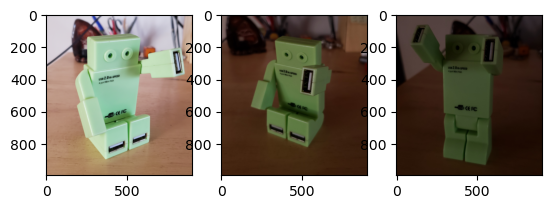

In [3]:
plt.figure()

for i in range(len(coord_cromaticas)):
    plt.subplot(1, len(coord_cromaticas), i+1)
    plt.imshow(coord_cromaticas[i])

plt.show()

In [4]:
def corr_cromatica(imagen):
    # Convertir la imagen a tipo float32 para realizar las operaciones
    imagen = imagen.astype(np.float32)

    # Separar los canales R, G, B
    R = imagen[:, :, 2]
    G = imagen[:, :, 1]
    B = imagen[:, :, 0]

    # Calcular la suma de los canales
    suma = R + G + B

    # Evitar división por cero
    suma[suma == 0] = 1

    # Normalizar cada canal
    R_norm = R / suma
    G_norm = G / suma
    B_norm = B / suma

    # Combinar los canales normalizados en una imagen resultante
    imagen_cromatica = cv.merge((B_norm, G_norm, R_norm))

    # Convertir de nuevo a formato uint8
    imagen_cromatica = (imagen_cromatica * 255).astype(np.uint8)
    
    return imagen_cromatica

In [5]:
coord_cromaticas_corr = [corr_cromatica(img) for img in coord_cromaticas]

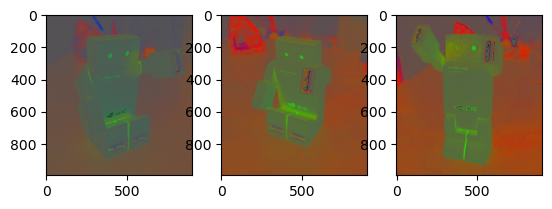

In [6]:
plt.figure()

for i in range(len(coord_cromaticas_corr)):
    plt.subplot(1, len(coord_cromaticas_corr), i+1)
    plt.imshow(coord_cromaticas_corr[i])

plt.show()

### 2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación

In [7]:
img1 = cv.imread('white_patch/test_blue.png')
img2 = cv.imread('white_patch/test_green.png')
img3 = cv.imread('white_patch/test_red.png')
img4 = cv.imread('white_patch/wp_blue.jpg')
img5 = cv.imread('white_patch/wp_green.png')
img6 = cv.imread('white_patch/wp_green2.jpg')
img7 = cv.imread('white_patch/wp_red.png')
img8 = cv.imread('white_patch/wp_red2.jpg')

white_patch_imagenes = [img1, img2, img3, img4, img5, img6, img7,img8]
for i in range(len(white_patch_imagenes)):
    white_patch_imagenes[i] = cv.cvtColor(white_patch_imagenes[i], cv.COLOR_BGR2RGB)

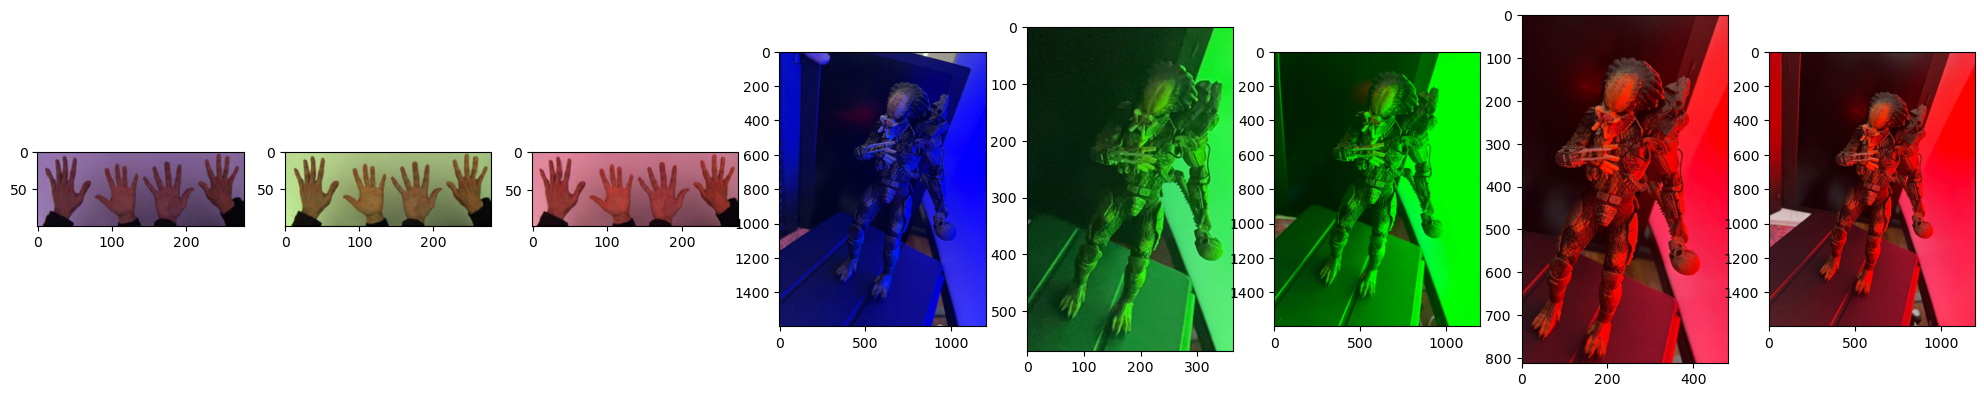

In [8]:
plt.figure(figsize=(25, 20))  # Set the figure size to 12 inches by 6 inches

for i in range(len(white_patch_imagenes)):
    plt.subplot(1, len(white_patch_imagenes), i+1)
    plt.imshow(white_patch_imagenes[i])

plt.show()

In [9]:
def corr_white_patch(img):
    # Conseguir el valor máximo de cada canal
    max_val = np.max(img, axis=(0, 1))
    print('Valores máximos de cada canal para la imagen ', max_val)

    # Reducir por 40% si alguno de los valores máximos es 255
    if np.any(max_val == 255):
        print('Reduciendo el valor máximo en un 40%')
        max_val = max_val * 0.6
        max_val = np.clip(max_val, 0, 255).astype(np.uint8)
        print('Nuevos valores máximos de cada canal para la imagen ', max_val)

    # Resto de la formula
    img_norm = img / max_val
    img_norm = np.clip(img_norm, 0, 1)
    print('-----------------------------------------------------------------------------------')
    return img_norm

In [10]:
corr_white_patch_imagenes = [corr_white_patch(img) for img in white_patch_imagenes]

Valores máximos de cada canal para la imagen  [165 138 200]
-----------------------------------------------------------------------------------
Valores máximos de cada canal para la imagen  [210 250 171]
-----------------------------------------------------------------------------------
Valores máximos de cada canal para la imagen  [247 157 175]
-----------------------------------------------------------------------------------
Valores máximos de cada canal para la imagen  [255 255 255]
Reduciendo el valor máximo en un 40%
Nuevos valores máximos de cada canal para la imagen  [153 153 153]
-----------------------------------------------------------------------------------
Valores máximos de cada canal para la imagen  [126 252 155]
-----------------------------------------------------------------------------------
Valores máximos de cada canal para la imagen  [170 255 172]
Reduciendo el valor máximo en un 40%
Nuevos valores máximos de cada canal para la imagen  [102 153 103]
------------

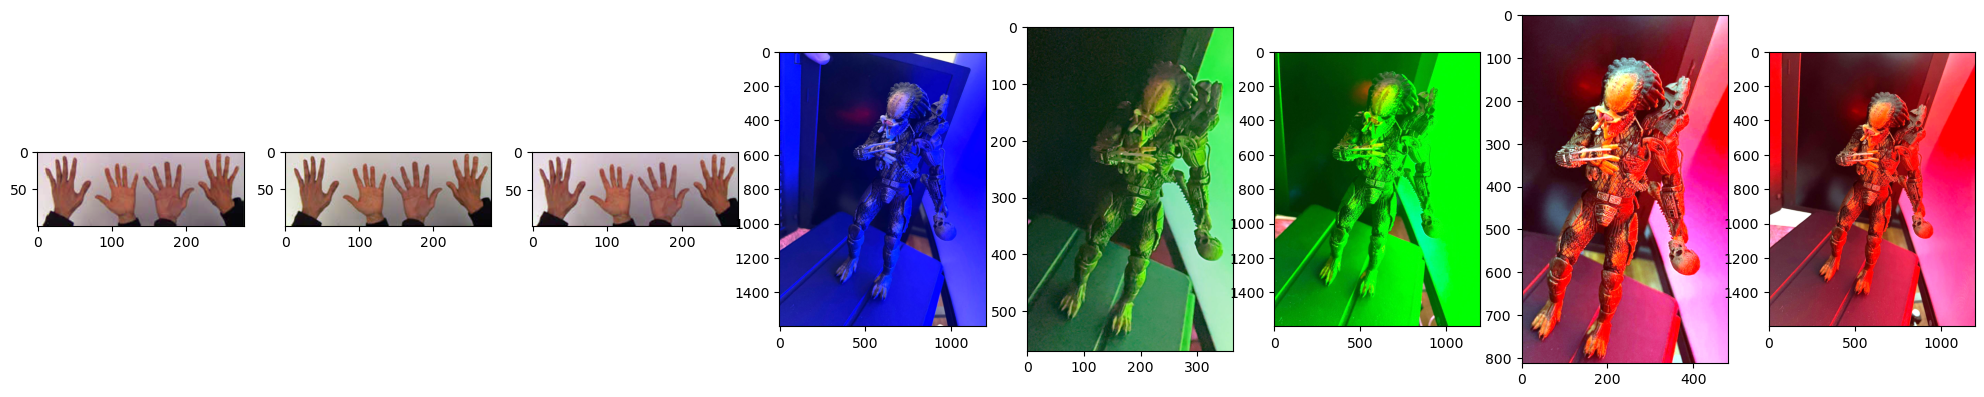

In [11]:
plt.figure(figsize=(25, 20))  # Set the figure size to 12 inches by 6 inches

for i in range(len(corr_white_patch_imagenes)):
    plt.subplot(1, len(corr_white_patch_imagenes), i+1)
    plt.imshow(corr_white_patch_imagenes[i])

plt.show()

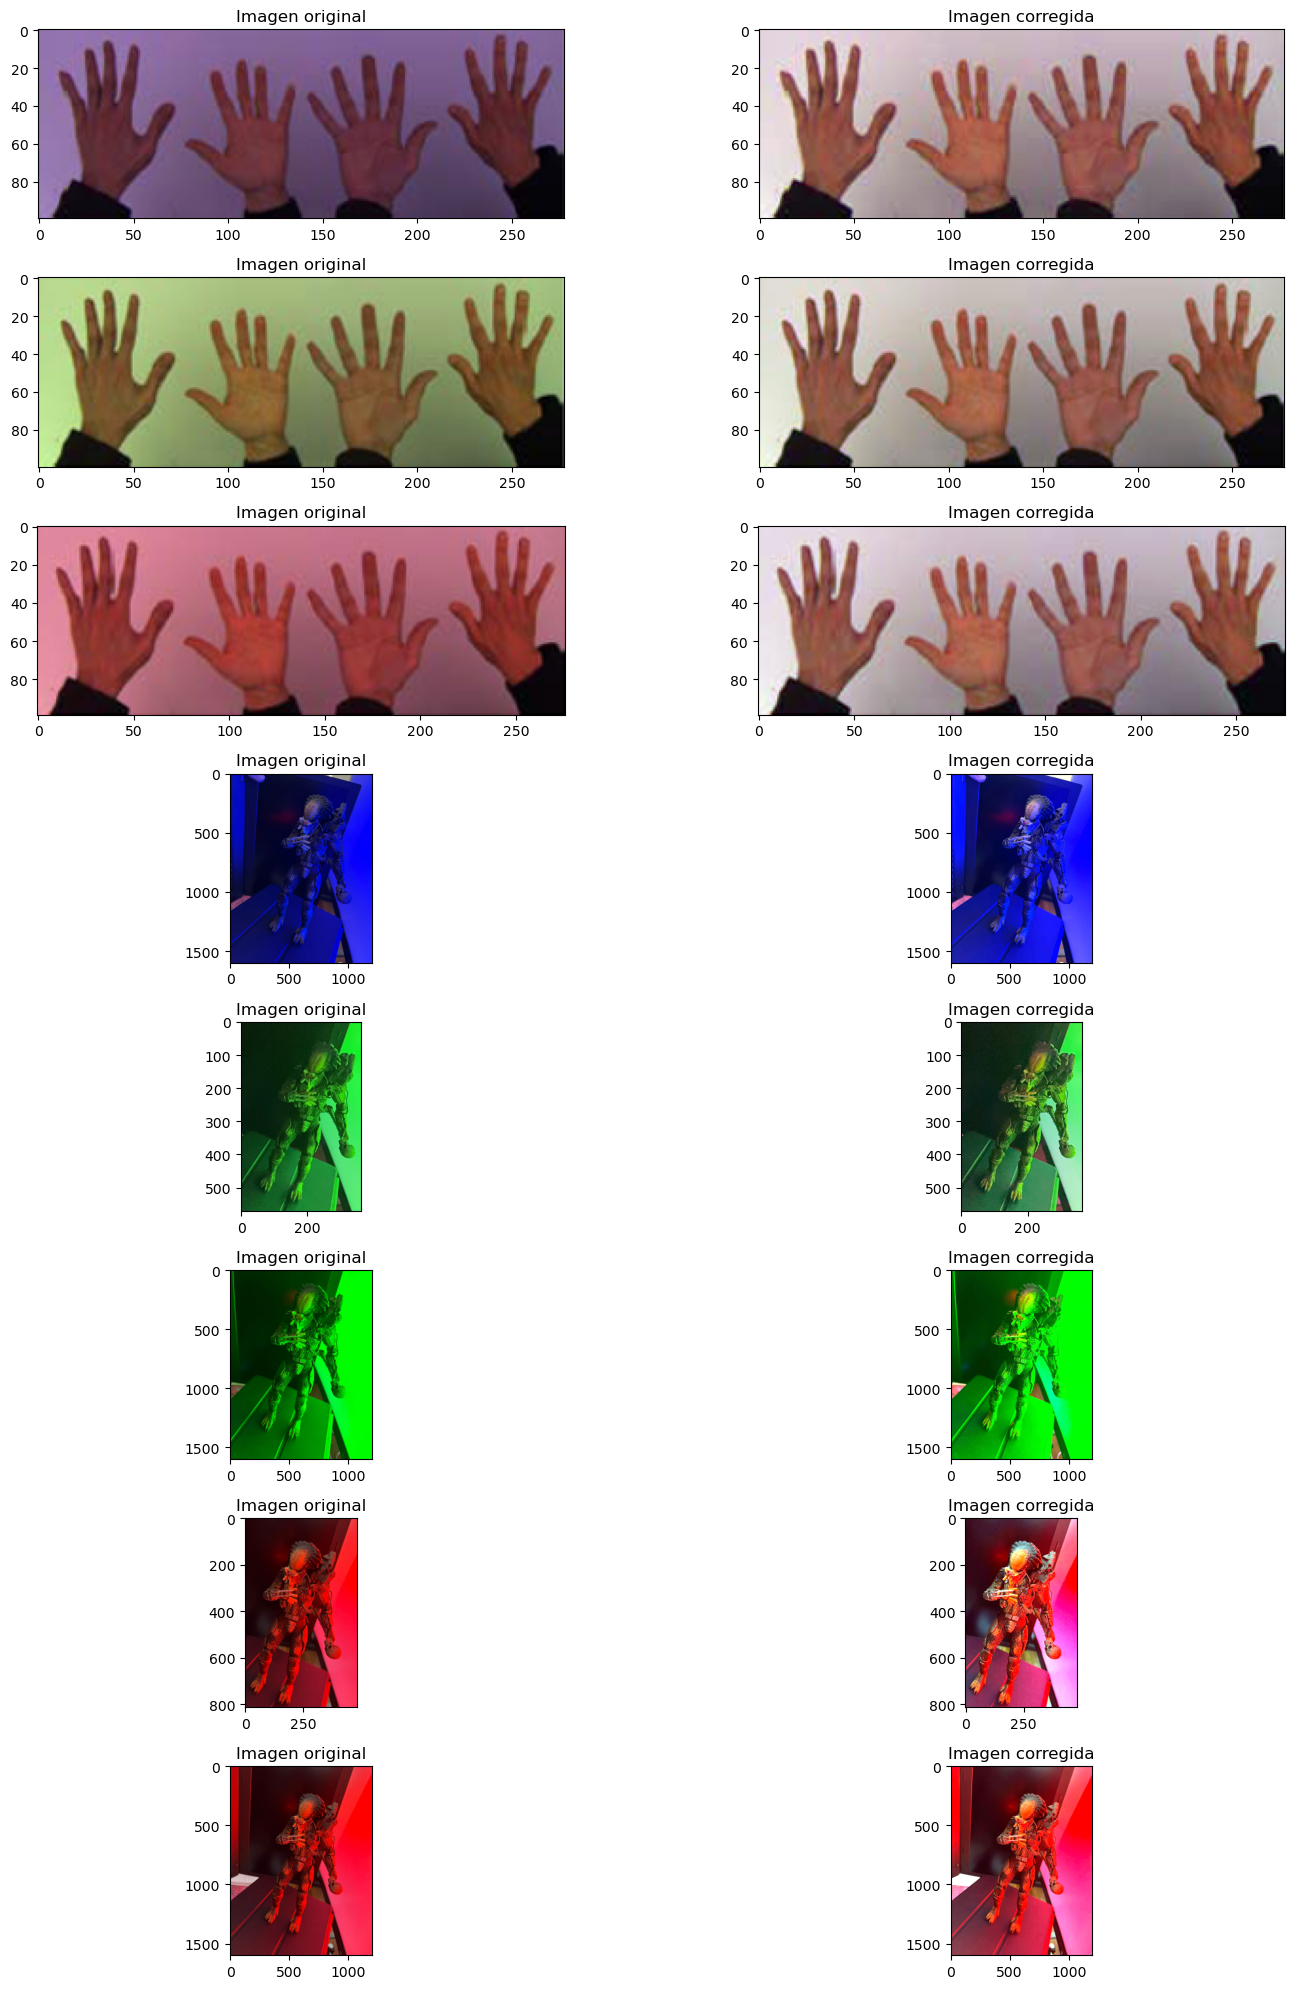

In [12]:
# Create a subplot grid
fig, axes = plt.subplots(nrows=len(white_patch_imagenes), ncols=2, figsize=(15, 20))

# Iterate over the images and plot them
for i in range(len(white_patch_imagenes)):
    # Plot the image from white_patch_imagenes
    axes[i, 0].imshow(white_patch_imagenes[i])
    axes[i, 0].set_title('Imagen original')

    # Plot the image from corr_white_patch_imagenes
    axes[i, 1].imshow(corr_white_patch_imagenes[i])
    axes[i, 1].set_title('Imagen corregida')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

## Parte 2

### 1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas. 

In [13]:
img1 = cv.imread('img1_tp.png', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('img2_tp.png', cv.IMREAD_GRAYSCALE)

imagenes_tp = [img1, img2]

In [14]:
imagenes_tp[0].shape

(288, 287)

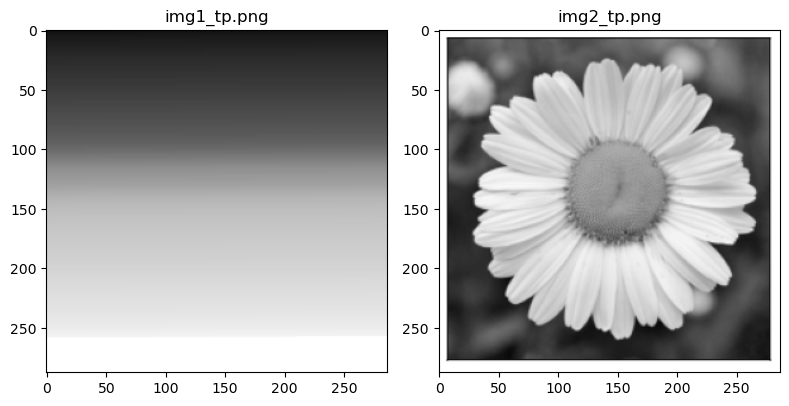

In [15]:
# Create a subplot grid
fig, axes = plt.subplots(nrows=1, ncols=len(imagenes_tp), figsize=(8, 8))

# Iterate over the images and plot them
for i in range(len(imagenes_tp)):
    axes[i].imshow(imagenes_tp[i], cmap='gray')
    axes[i].set_title(f'img{i+1}_tp.png')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

### 2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, considera que puede ser de utilidad tomar como ‘features’ a los histogramas?

In [16]:
for i in range(len(imagenes_tp)):
    imagenes_tp[i] = cv.cvtColor(imagenes_tp[i], cv.COLOR_BGR2RGB)

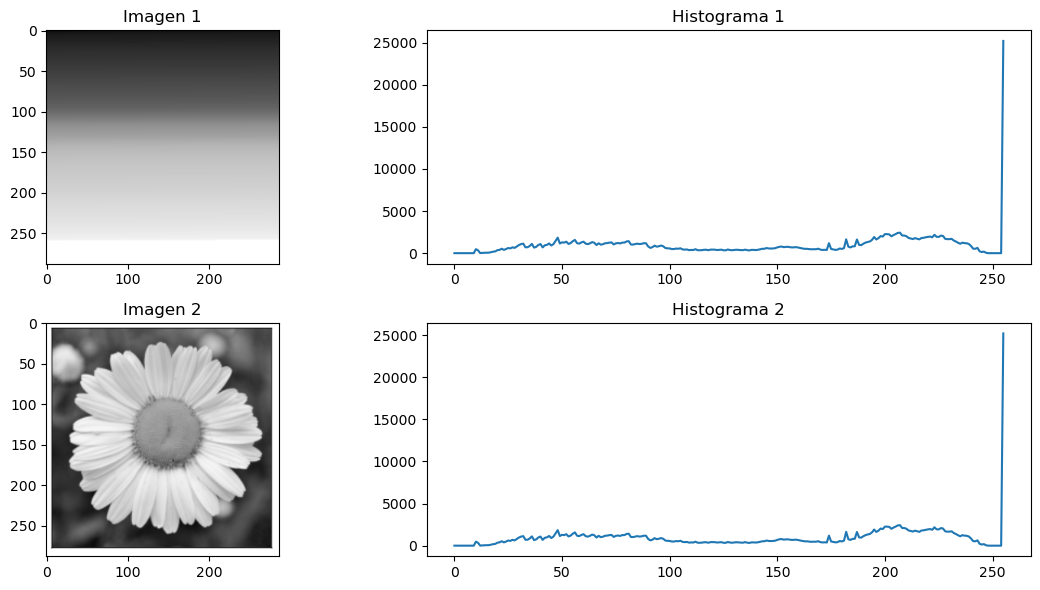

In [39]:
# Create a subplot grid
fig, axes = plt.subplots(nrows=len(imagenes_tp), ncols=2, figsize=(12, 6))

# Iterate over the images and plot them
for i in range(len(imagenes_tp)):
    # Plot the image
    axes[i, 0].imshow(imagenes_tp[i])
    axes[i, 0].set_title(f'Imagen {i+1}')

    # Compute the histogram for the image
    hist, bins = np.histogram(imagenes_tp[i].ravel(), 256, [0, 256])

    # Plot the histogram
    axes[i, 1].plot(hist)
    axes[i, 1].set_title(f'Histograma {i+1}')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

Vemos que los histogramas de ambas imagenes muestran algunas similaridades:

- Valores de Baja Intensidad: Ambos histogramas tienen una cantidad considerable de píxeles oscuros (en el rango de 0-100). Esto tiene sentido porque ambas imágenes contienen áreas oscuras significativas: las sombras en la flor y el degradado de negro a gris en la imagen anterior.

- Valores de Alta Intensidad: En ambos histogramas, vemos un pico hacia los valores de intensidad más altos (200-255). Esto refleja las regiones brillantes en ambas imágenes: los pétalos claros en la flor y las áreas más brillantes en el degradado.

Diferencias Clave:

- Imagen de Degradé: En la imagen de degradado, los valores de intensidad cambian de manera más gradual, lo que se refleja en el histograma como una distribución más continua a través de diferentes rangos de intensidad. Hay una transición suave de negro a blanco.

- Imagen de la Flor: Aunque la imagen de la flor tiene una forma similar, las intensidades de píxeles están más agrupadas en grupos distintos, particularmente alrededor de 50-100 (sombras del fondo) y 200+ (pétalos brillantes). Este agrupamiento muestra transiciones más definidas entre el fondo oscuro y la flor clara, mientras que la imagen del degradado tiene transiciones más suaves.

El contraste similar entre oscuro y claro en ambas imágenes hace que sus histogramas tengan una apariencia general similar.

En el mismo orden de ideas, tomando en cuenta lo anteriormente mencionado, en este ejercicio específicamente no vemos beneficios de utilizar estos histogramas como features de un modelo de clasificación, debido al hecho de que ambas imágenes comparten histogramas extremadamente similares pero las imágenes son completamente distintas. 

Para concluir, si utilizáramos los dos histogramas como features en un modelo de clasificación binaria por ej, para predecir si una imagen es una flor o no, no serviría de mucho porque ambos histogramas son iguales y habría una tasa de falsos positivos casi infinita.

### 3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes separadas.

In [19]:
img = cv.imread('segmentacion.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

#### Histogramas

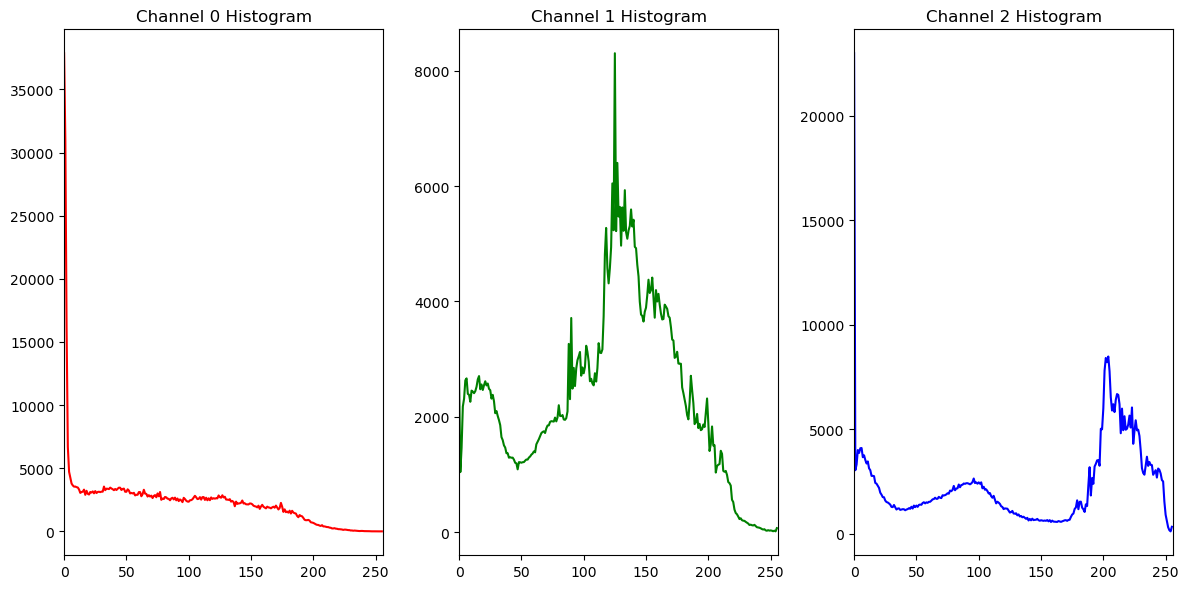

In [20]:
# Split the image into its color channels
channels = cv.split(img)

# Define the channels you want to plot (e.g., Red and Green channels)
channel_indices = [0, 1, 2]  # 0 for Red, 1 for Green in RGB

# Colors for the histograms
colors = ['r', 'g','b']

# Create a subplot grid
fig, axes = plt.subplots(nrows=1, ncols=len(channel_indices), figsize=(12, 6))

# Iterate over the selected channels and plot their histograms
for i, channel_index in enumerate(channel_indices):
    # Compute the histogram for the channel
    hist = cv.calcHist([channels[channel_index]], [0], None, [256], [0, 256])
    
    # Plot the histogram
    axes[i].plot(hist, color=colors[i])
    axes[i].set_title(f'Channel {channel_index} Histogram')
    axes[i].set_xlim([0, 256])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

- Canal Rojo: El histograma está altamente concentrado en los valores más bajos (0-50), lo que indica que la imagen contiene muchas tonalidades más oscuras de rojo, o una falta de tonos rojos intensos. 
La caída abrupta sugiere que los rojos más brillantes están menos presentes. 

- Canal Verde: El canal verde está distribuido de manera más uniforme, con un pico notable alrededor de los valores medios (100-150), lo que sugiere que hay muchas tonalidades de verde de brillo medio. Esto se debe probablemente a la vegetación en el paisaje o a la mezcla de colores en la imagen. 

- Canal Azul: Hay un pico significativo en los valores más oscuros de azul (0-50), así como una segunda concentración hacia valores más altos (alrededor de 180-220). Esto tiene sentido ya que la imagen contiene cielo y agua, que tienden a presentar tonos azules intensos.

#### Segmentación

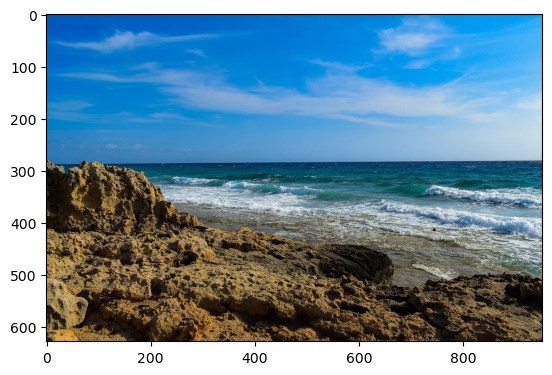

In [21]:
plt.figure()
plt.imshow(img)
plt.show()

##### Cielo

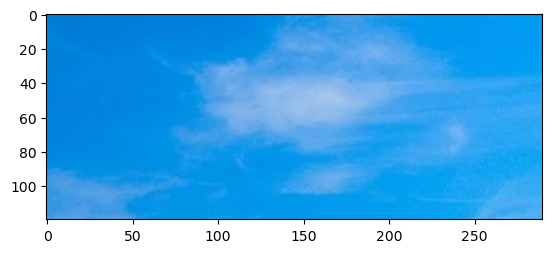

In [22]:
# Tomamos una muestra del cielo
img_muestra_cielo = img[0:120, 550:840,:]
plt.figure(1)
plt.imshow(img_muestra_cielo)
plt.show()

In [23]:
# Calculamos un modelo estadístico sencillo para caracterizar el color del morrón rojo en el espacio RGB
color_mean, color_std = cv.meanStdDev(img_muestra_cielo)
print(color_mean.flatten().tolist())
print(color_std.flatten().tolist())

[35.652672413793105, 154.38689655172413, 233.4697988505747]
[39.73032978628758, 15.022097540175274, 7.917030708977626]


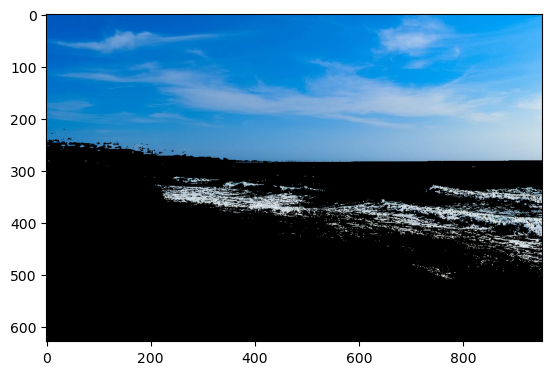

In [28]:
# Pintemos de blanco los puntos que estén cerca de la media en un radio menor que 3 sigmas
# para ¨capturar¨ el 99.7 % de pixeles.
n_sigma = 6
mask = cv.inRange(img, color_mean-color_std * n_sigma,  color_mean+color_std * n_sigma)
img_segmentada = cv.bitwise_and(img, img, mask=mask)

plt.figure(3)
plt.imshow(img_segmentada)
plt.show()

##### Agua

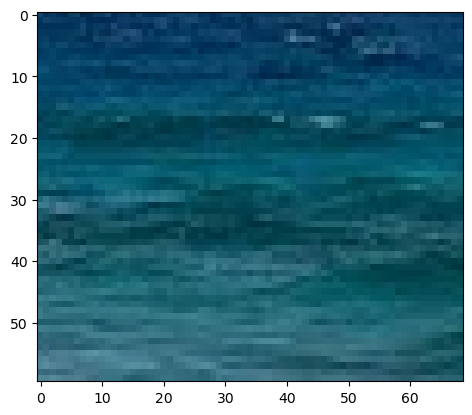

In [271]:
# Tomamos una muestra del cielo
img_muestra_agua = img[285:345, 587:656,:]
plt.figure(2)
plt.imshow(img_muestra_agua)
plt.show()

In [272]:
# Calculamos un modelo estadístico sencillo para caracterizar el color del morrón rojo en el espacio RGB
color_mean, color_std = cv.meanStdDev(img_muestra_agua)
print(color_mean.flatten().tolist())
print(color_std.flatten().tolist())

[19.657487922705315, 84.16545893719807, 104.34202898550724]
[19.819757367214784, 20.35052528508167, 17.49147264260188]


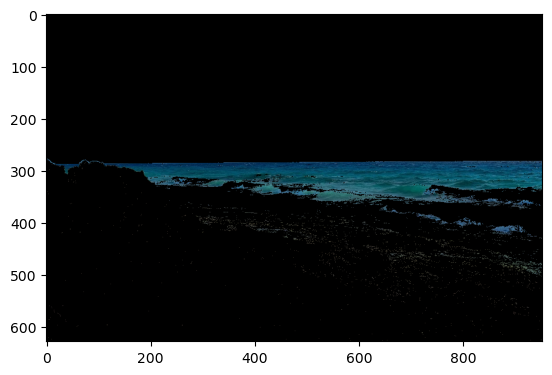

In [273]:
# Pintemos de blanco los puntos que estén cerca de la media en un radio menor que 3 sigmas
# para ¨capturar¨ el 99.7 % de pixeles.
n_sigma = 3
mask = cv.inRange(img, color_mean-color_std * n_sigma,  color_mean+color_std * n_sigma)
img_segmentada = cv.bitwise_and(img, img, mask=mask)

plt.figure(3)
plt.imshow(img_segmentada)
plt.show()

##### Tierra

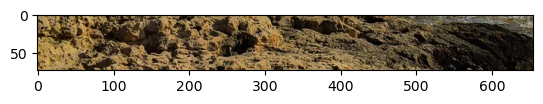

In [274]:
# Tomamos una muestra del cielo
img_muestra_tierra = img[431:504, 1:656, :]
plt.figure(3)
plt.imshow(img_muestra_tierra)
plt.show()

In [275]:
# Calculamos un modelo estadístico sencillo para caracterizar el color del morrón rojo en el espacio RGB
color_mean, color_std = cv.meanStdDev(img_muestra_tierra)
print(color_mean.flatten().tolist())
print(color_std.flatten().tolist())

[94.2996130921259, 76.9139391404371, 50.072780508208716]
[57.95374656062271, 50.98533062892145, 38.44402265965979]


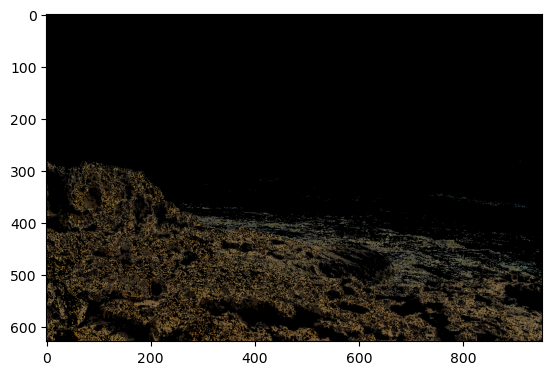

In [246]:
# Pintemos de blanco los puntos que estén cerca de la media en un radio menor que 3 sigmas
# para ¨capturar¨ el 99.7 % de pixeles.
n_sigma = 1
mask = cv.inRange(img, color_mean-color_std * n_sigma,  color_mean+color_std * n_sigma)
img_segmentada = cv.bitwise_and(img, img, mask=mask)

plt.figure(3)
plt.imshow(img_segmentada)
plt.show()

Ajustamos el sigma para cada segmentación. Para el cielo: 6 Sigma, para el mar: 3 Sigma y la tierra: 1 Sigma.